# A Simple Example of Analyzing COVID-19 Data

## Data source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Load data from S3

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-wei-demo-5465148971/data.csv') # load the data from s3
df.head() #show the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## View data

In [2]:
df.shape #show the number of rows and columns 

(61900, 12)

In [3]:
df['cases'] #select a column 

0        746
1        298
2        113
3         63
4        202
        ... 
61895      0
61896      0
61897      0
61898      1
61899      1
Name: cases, Length: 61900, dtype: int64

In [4]:
df.sort_values(by='deaths') #sort data by a column

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
52925,25/05/2020,25,5,2020,-372,-1918,Spain,ES,ESP,46937060.0,Europe,16.255812
31909,24/08/2020,24,8,2020,237,-443,Kyrgyzstan,KG,KGZ,6415851.0,Asia,45.964284
29271,25/06/2020,25,6,2020,577,-31,Italy,IT,ITA,60359546.0,Europe,6.042126
31304,06/08/2020,6,8,2020,218,-12,Kosovo,XK,XKX,1798506.0,Europe,178.259066
28207,03/10/2020,3,10,2020,466,-5,Ireland,IE,IRL,4904240.0,Europe,97.711368
...,...,...,...,...,...,...,...,...,...,...,...,...
59241,18/04/2020,18,4,2020,30833,3770,United_States_of_America,US,USA,329064917.0,America,128.910430
16906,07/09/2020,7,9,2020,-8261,3800,Ecuador,EC,ECU,17373657.0,America,11.598019
44907,24/07/2020,24,7,2020,4546,3887,Peru,PE,PER,32510462.0,America,168.093582
44886,14/08/2020,14,8,2020,9441,3935,Peru,PE,PER,32510462.0,America,309.143561


In [5]:
df[0:5] #slice by rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [6]:
df[df['deaths']>5] # select rows by values 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61754,13/08/2020,13,8,2020,75,18,Zimbabwe,ZW,ZWE,14645473.0,Africa,13.751690
61760,07/08/2020,7,8,2020,56,13,Zimbabwe,ZW,ZWE,14645473.0,Africa,15.506498
61763,04/08/2020,4,8,2020,154,10,Zimbabwe,ZW,ZWE,14645473.0,Africa,16.127851
61766,01/08/2020,1,8,2020,77,14,Zimbabwe,ZW,ZWE,14645473.0,Africa,11.942257


## Explore and clean data

In [7]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [8]:
df['date'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y') #change the data type to date with specific format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  object        
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [9]:
#rename columns
df = df.rename(columns={"popData2019": "pop", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cum","countriesAndTerritories":"country" }) 
df.head()

,dateRep,day,month,year,cases,deaths,country,geoId,countryterritoryCode,pop,continentExp,cum,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10


In [10]:
df.isnull().sum() #show the number of rows containing null value

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
country                    0
geoId                    275
countryterritoryCode     123
pop                      123
continentExp               0
cum                     2879
date                       0
dtype: int64

In [11]:
df = df.dropna() #drop null values
df.isnull().sum()

dateRep                 0
day                     0
month                   0
year                    0
cases                   0
deaths                  0
country                 0
geoId                   0
countryterritoryCode    0
pop                     0
continentExp            0
cum                     0
date                    0
dtype: int64

In [12]:
df.describe() #statistical summary of the data

,day,month,year,cases,deaths,pop,cum,date
count,58759.000000,58759.000000,58759.0,58759.000000,58759.000000,5.875900e+04,58759.000000,58759
mean,15.649620,7.262377,2020.0,1216.417179,27.441890,4.138481e+07,66.470760,2020-07-24 04:09:11.159822336
min,1.000000,1.000000,2020.0,-8261.000000,-1918.000000,8.150000e+02,-147.419587,2020-01-13 00:00:00
25%,8.000000,5.000000,2020.0,0.000000,0.000000,1.293120e+06,0.762010,2020-05-17 00:00:00
50%,15.000000,7.000000,2020.0,20.000000,0.000000,7.813207e+06,6.698860,2020-07-27 00:00:00
75%,23.000000,10.000000,2020.0,312.000000,5.000000,2.860872e+07,52.618251,2020-10-05 00:00:00
max,31.000000,12.000000,2020.0,234633.000000,4928.000000,1.433784e+09,1900.836210,2020-12-14 00:00:00
std,8.825845,2.840879,0.0,6952.740171,134.548086,1.540087e+08,162.657960,NaN


In [13]:
df = df[(df['deaths']>=0) & (df['cases']>=0) & (df['cum']>=0)] #filter data
df.describe()

,day,month,year,cases,deaths,pop,cum,date
count,58697.000000,58697.000000,58697.0,58697.000000,58697.000000,5.869700e+04,58697.000000,58697
mean,15.649181,7.262824,2020.0,1217.885837,27.435337,4.141426e+07,66.553365,2020-07-24 04:28:27.726119168
min,1.000000,1.000000,2020.0,0.000000,0.000000,8.150000e+02,0.000000,2020-01-13 00:00:00
25%,8.000000,5.000000,2020.0,0.000000,0.000000,1.293120e+06,0.768125,2020-05-17 00:00:00
50%,15.000000,7.000000,2020.0,20.000000,0.000000,7.813207e+06,6.719107,2020-07-27 00:00:00
75%,23.000000,10.000000,2020.0,313.000000,5.000000,2.860872e+07,52.690073,2020-10-05 00:00:00
max,31.000000,12.000000,2020.0,234633.000000,4928.000000,1.433784e+09,1900.836210,2020-12-14 00:00:00
std,8.823526,2.841859,0.0,6956.155743,133.447458,1.540864e+08,162.702141,NaN


In [14]:
df['country'].value_counts() #show the count of unique values 

country
United_Kingdom      337
Australia           337
Austria             337
Switzerland         337
Taiwan              337
                   ... 
Comoros             214
Lesotho             201
Solomon_Islands      47
Marshall_Islands     34
Vanuatu              21
Name: count, Length: 211, dtype: int64

In [15]:
df = df[['country','cases','deaths','pop','cum','date']] # keep specific columns 
df.head()

,country,cases,deaths,pop,cum,date
0,Afghanistan,746,6,38041757.0,9.013779,2020-12-14
1,Afghanistan,298,9,38041757.0,7.052776,2020-12-13
2,Afghanistan,113,11,38041757.0,6.868768,2020-12-12
3,Afghanistan,63,10,38041757.0,7.134266,2020-12-11
4,Afghanistan,202,16,38041757.0,6.968658,2020-12-10


In [16]:
df.set_index('date',inplace=True) #define the index
df.head()

,country,cases,deaths,pop,cum
date,,,,,
2020-12-14,Afghanistan,746,6,38041757.0,9.013779
2020-12-13,Afghanistan,298,9,38041757.0,7.052776
2020-12-12,Afghanistan,113,11,38041757.0,6.868768
2020-12-11,Afghanistan,63,10,38041757.0,7.134266
2020-12-10,Afghanistan,202,16,38041757.0,6.968658


In [17]:
df.loc['2020-04-05'] #filter the data based on the index value

,country,cases,deaths,pop,cum
date,,,,,
2020-04-05,Afghanistan,35,1,38041757.0,0.646658
2020-04-05,Albania,29,2,2862427.0,8.978395
2020-04-05,Algeria,80,25,43053054.0,2.582860
2020-04-05,Andorra,27,1,76177.0,496.212768
2020-04-05,Angola,2,0,31825299.0,0.025137
...,...,...,...,...,...
2020-04-05,Uzbekistan,39,0,32981715.0,0.706452
2020-04-05,Venezuela,0,2,28515829.0,0.378737
2020-04-05,Vietnam,1,0,96462108.0,0.151355


In [18]:
df.to_csv('clean_data.csv') #store the cleaned data to local computer

## Visualize data

### Distribution of the Data

array([[<Axes: title={'center': 'cases'}>,
        <Axes: title={'center': 'deaths'}>],
       [<Axes: title={'center': 'pop'}>, <Axes: title={'center': 'cum'}>]],
      dtype=object)

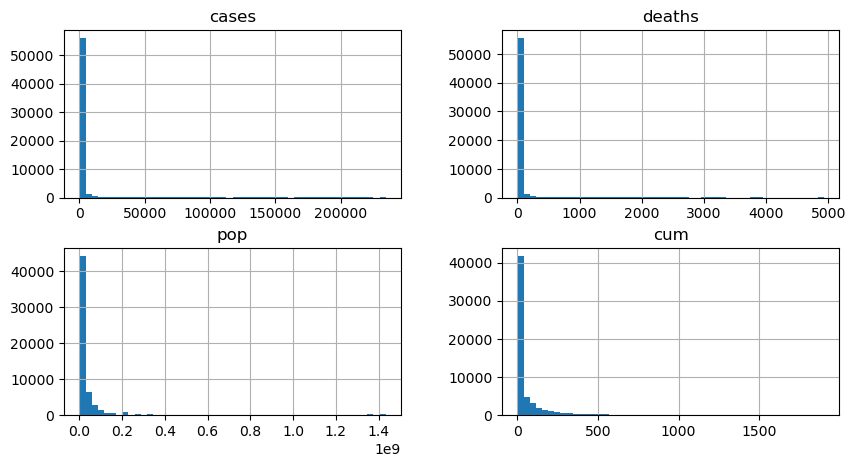

In [19]:
df.hist(layout=(2,2), figsize=(10, 5), sharey=False, sharex=False, bins=50) #use multiple charts to show the distribution of all columns

### The Sum of Case Numbers per Day

In [20]:
sum_cases_by_date = df.groupby('date')['cases'].sum() #aggregate the total case number per day
sum_cases_by_date.head()

date
2020-01-13    1
2020-01-14    1
2020-01-15    1
2020-01-16    0
2020-01-17    5
Name: cases, dtype: int64

<Axes: xlabel='date'>

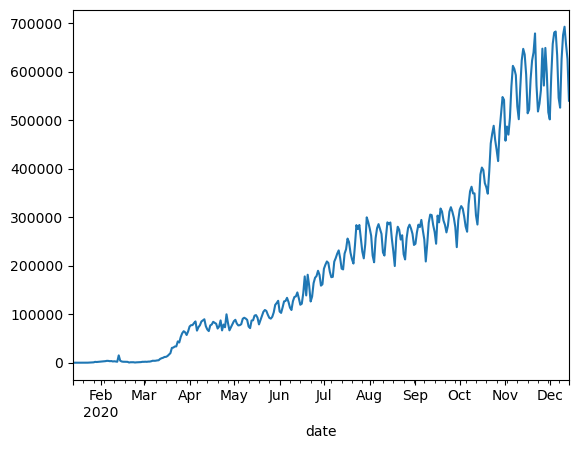

In [21]:
sum_cases_by_date.plot() #use a line chart to show the result

### The Top 10 Countries with the Highest Deaths

<Axes: xlabel='country'>

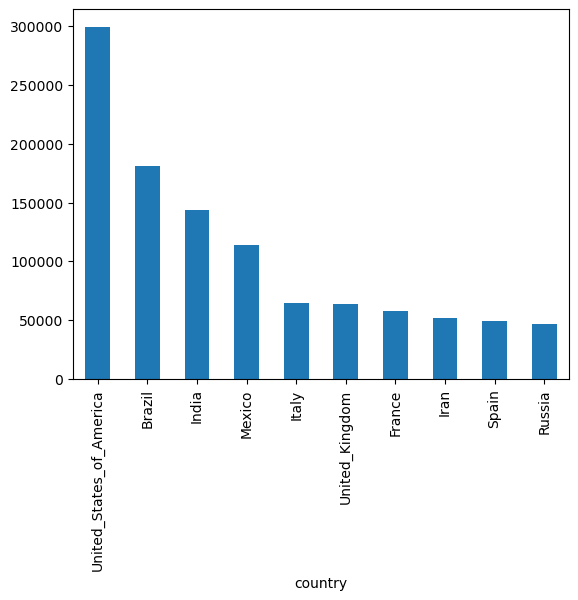

In [22]:
sum_deaths_by_country = df.groupby('country')['deaths'].sum() # calculate the total deaths per day
sum_deaths_by_country.nlargest(10).plot.bar() # use a bar chart to show the results of the top 10 countries 

### The USA Data Visualization

In [23]:
USA_data = df[df['country']=='United_States_of_America'] #select the USA data

<Axes: xlabel='date', ylabel='deaths'>

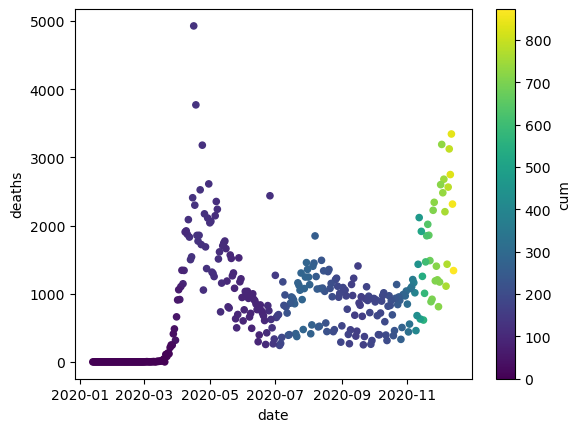

In [24]:
USA_data.reset_index().plot.scatter(x='date',y='deaths',c='cum') #use scatter plot to show the result